<a href="https://colab.research.google.com/github/hawkeyedatatsai/Find-Best-K-with-Elbow-Plot-and-Silhouette-Scores/blob/main/1_KMeans_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can [download the data here](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this [data source](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means).



In [9]:
from IPython.core.display import Path
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Path ='/content/1-cust_seg.csv'
df = pd.read_csv(Path)
print(df.describe())
print('\n')
print(df.info())
print('\n')
df.head()

       Unnamed: 0  Customer Id         Age         Edu  Years Employed  \
count   850.00000    850.00000  850.000000  850.000000      850.000000   
mean    424.50000    425.50000   35.029412    1.710588        8.565882   
std     245.51816    245.51816    8.041432    0.927784        6.777884   
min       0.00000      1.00000   20.000000    1.000000        0.000000   
25%     212.25000    213.25000   29.000000    1.000000        3.000000   
50%     424.50000    425.50000   34.000000    1.000000        7.000000   
75%     636.75000    637.75000   41.000000    2.000000       13.000000   
max     849.00000    850.00000   56.000000    5.000000       33.000000   

           Income   Card Debt  Other Debt   Defaulted  DebtIncomeRatio  
count  850.000000  850.000000  850.000000  700.000000       850.000000  
mean    46.675294    1.576820    3.078773    0.261429        10.171647  
std     38.543054    2.125843    3.398799    0.439727         6.719441  
min     13.000000    0.012000    0.046000

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [2]:
df = df.drop(["Unnamed: 0", "Customer Id"], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
df.isna().sum()/len(df)*100
#not going to drop column since there are no significantly missing values

Age                 0.000000
Edu                 0.000000
Years Employed      0.000000
Income              0.000000
Card Debt           0.000000
Other Debt          0.000000
Defaulted          17.647059
DebtIncomeRatio     0.000000
dtype: float64

In [10]:
# Instantiate Standard Scaler
scaler = StandardScaler()
#handle missing values on numeric by using appropriate imputation strategies
mean_imputer = SimpleImputer(strategy = "mean")
num_pipeline = make_pipeline(mean_imputer, scaler)
num_cols = ['Defaulted']
num_tuple = (num_pipeline, num_cols)

preprocessor = make_column_transformer(num_tuple, remainder="drop", 
                                       verbose_feature_names_out=False)
# Fit & transform data.
scaled_df = preprocessor.fit_transform(df)

#Use KMeans to create various customer segments.


##Use an Elbow Plot of inertia.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-23cfd7af6bfa>:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(scaled_df)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` wil

Text(0, 0.5, 'inertia')

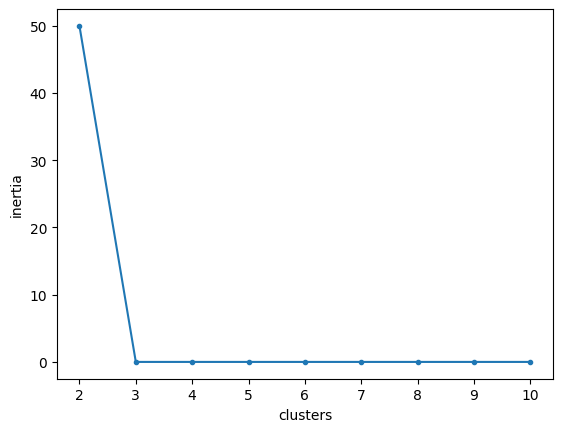

In [14]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
#looks like 3 is the elbow point

thiss what it looks like when i expand k range to 101

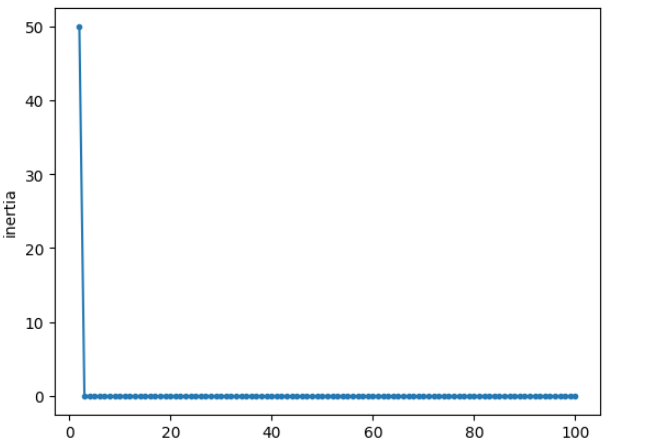

##And a plot of Silhouette Scores.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-ab00242e7f32>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(scaled_df)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` wil

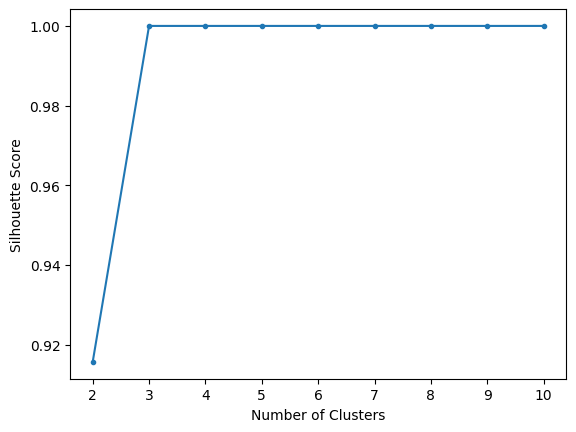

In [15]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
#higher silhouette score is preferred

##Choose a K based on the results.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


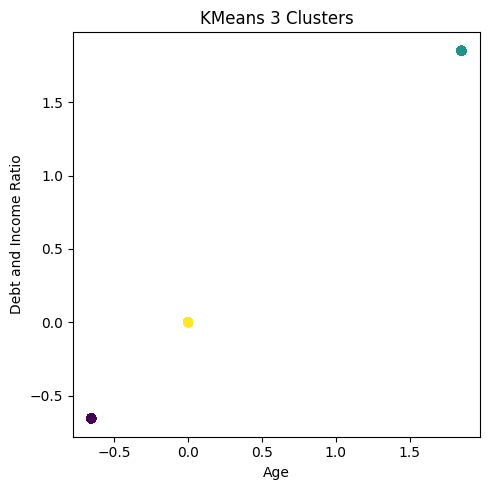

In [21]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(scaled_df)
#Save the cluster labels to the dataframe 
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(scaled_df, scaled_df, c = df['cluster3'])
ax.set_xlabel('Age')
ax.set_ylabel('Debt and Income Ratio')
ax.set_title('KMeans 3 Clusters')
plt.tight_layout();

Results from Elbow Plot and silhouette scores suggest when the # of cluster is 3 has the best results.